In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # for file handling
import cv2 # for image processing
import random

In [2]:
path = '/kaggle/input/masked-gesture-dataset/Masked Gesture Dataset/Masked Gesture Dataset'

In [3]:
IMAGE_SIZE = 128

In [4]:
images = []

In [5]:
total = 0;
classes = [] # all labels for images
for label in os.listdir(path): # iterating thorugh all the folders in the directory
#     print(label)
    label_path = os.path.join(path, label)
    count = 0;
    for image_name in os.listdir(label_path):
        count += 1
        image_path = os.path.join(label_path,image_name)
        images.append([label,image_path])
    print(f"{label} :- {count} images")
    total += count
    classes.append(label)
print("Total images: ",total)
print("Total classes: ",len(classes))

1finger :- 1468 images


thumbsdown :- 1081 images
2finger :- 1494 images


3finger :- 834 images


yoyo :- 1497 images
spreadoutpalm :- 1125 images


pinky :- 1503 images
thumbsup :- 1278 images


fingersclosein :- 1098 images


kitli :- 1036 images
italydown :- 1048 images
Total images:  13462
Total classes:  11


In [6]:
classes

['1finger',
 'thumbsdown',
 '2finger',
 '3finger',
 'yoyo',
 'spreadoutpalm',
 'pinky',
 'thumbsup',
 'fingersclosein',
 'kitli',
 'italydown']

In [7]:
df = pd.DataFrame(images, columns=['label','image_path']) # making a dataframe for the images
df

,label,image_path
0,1finger,/kaggle/input/masked-gesture-dataset/Masked Ge...
1,1finger,/kaggle/input/masked-gesture-dataset/Masked Ge...
2,1finger,/kaggle/input/masked-gesture-dataset/Masked Ge...
3,1finger,/kaggle/input/masked-gesture-dataset/Masked Ge...
4,1finger,/kaggle/input/masked-gesture-dataset/Masked Ge...
...,...,...
13457,italydown,/kaggle/input/masked-gesture-dataset/Masked Ge...
13458,italydown,/kaggle/input/masked-gesture-dataset/Masked Ge...
13459,italydown,/kaggle/input/masked-gesture-dataset/Masked Ge...
13460,italydown,/kaggle/input/masked-gesture-dataset/Masked Ge...


In [8]:
# converting image paths to image pixel values
def convert_image_to_pixel_values(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image,(IMAGE_SIZE,IMAGE_SIZE))
    return image.reshape(-1) / 255.0


In [9]:
df['image'] = df['image_path'].apply(lambda x:convert_image_to_pixel_values(x))

In [10]:
df.loc[1,'image'].shape # 128*128 = 16384

(16384,)

In [11]:
# for shuffling
df1 = df.sample(frac=1.0, random_state=73) # random_state is for consistent randomizing 
df1.reset_index(drop=True,inplace=True) # resetting indices after shuffling
df1.drop(columns=['image_path'],inplace=True) # dropping the image path column as it is not needed
df1

,label,image
0,3finger,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,spreadoutpalm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,pinky,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,italydown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,3finger,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
13457,3finger,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13458,pinky,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13459,2finger,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13460,pinky,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


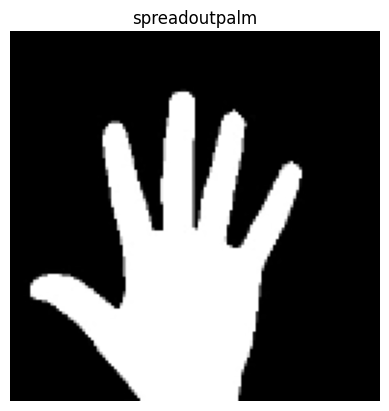

In [12]:
#showing an image sample
example = df1.loc[100,'image'].reshape(128,128)

plt.imshow(example, cmap="gray")
plt.title(df1.loc[100,'label'])
plt.axis('off')
plt.show()


In [13]:
print(df1.shape)
m = df1.shape[0] ## training examples

(13462, 2)


In [14]:
train_split = int(0.8*m)
test_split = int(0.2*m)

In [15]:
train_df = df1[0:train_split] # splitting into train and test dataframes
test_df = df1[m - test_split:]


In [16]:
train_df

,label,image
0,3finger,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,spreadoutpalm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,pinky,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,italydown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,3finger,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
10764,thumbsdown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10765,thumbsup,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10766,yoyo,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10767,yoyo,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [17]:
test_df

,label,image
10770,pinky,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10771,italydown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10772,thumbsup,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10773,2finger,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10774,1finger,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
13457,3finger,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13458,pinky,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13459,2finger,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13460,pinky,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [18]:
# making training and testing datasets
X_train = np.stack(train_df['image'].values)   # .values returns the arrays containing all pixels in order and np.stack(), stacks them into different rows
Y_train = train_df['label'].values.reshape(1,train_split)
X_test = np.stack(test_df['image'].values)
Y_test = test_df['label'].values.reshape(1,test_split)


In [19]:
Y_test.shape


(1, 2692)

In [20]:
X_train = X_train.T #each column will be for a single training example
X_test = X_test.T
print(X_train.shape)
print(Y_train.shape)

(16384, 10769)
(1, 10769)


In [21]:
print(X_test.shape)

(16384, 2692)


In [22]:
n_i = IMAGE_SIZE * IMAGE_SIZE # input layer size
n_h = 250 # hidden layer size
n_o = len(classes) #output layer size,  if we add additional classes in the future we can change this


def init_params(n_i, n_h, n_o):
    W1 = np.random.randn(n_h, n_i) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_o, n_h) * 0.01
    b2 = np.zeros((n_o, 1))
    return W1, b1, W2, b2

In [23]:
def relu(Z):
    return np.maximum(0, Z)

def relu_d(Z):
    return Z > 0

def softmax(Z):
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)


In [24]:
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.shape[0]
    dZ2 = A2.copy()
    dZ2[Y, range(m)] -= 1 #subtracts 1 from the correct label i.e Y through all training examples i.e.  m
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_d(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [25]:
#creating indexed mapping for labels - dictionary
label_mapping = {}
for i in range(len(classes)):
    label = classes[i]
    label_mapping[label] = i
print(label_mapping)

{'1finger': 0, 'thumbsdown': 1, '2finger': 2, '3finger': 3, 'yoyo': 4, 'spreadoutpalm': 5, 'pinky': 6, 'thumbsup': 7, 'fingersclosein': 8, 'kitli': 9, 'italydown': 10}


In [26]:
#converting Y_train to label maps
Y_train_map = np.array([label_mapping[label] for label in Y_train[0]])
print(Y_train_map)


[3 5 6 ... 4 4 6]


In [27]:
Y_test_map = np.array([label_mapping[label] for label in Y_test[0]])
print(Y_test_map)


[ 6 10  7 ...  2  6  4]


In [28]:
def predict(A2):
    return np.argmax(A2, axis=0)

def accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [29]:
def gradient_descent(X, Y, learning_rate, iterations):
    
    W1, b1, W2, b2 = init_params(n_i, n_h, n_o)
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W2, X, Y)
        
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        
        if i % 50 == 0 or i == iterations - 1:
            predictions = predict(A2)
            acc = accuracy(predictions, Y)
            print(f"Accuracy after iteration {i}: {acc * 100:.2f}%")
    
    return W1, b1, W2, b2

In [30]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train_map, 0.1, 250)


Accuracy after iteration 0: 4.71%


Accuracy after iteration 50: 79.95%


Accuracy after iteration 100: 95.56%


Accuracy after iteration 150: 97.79%


Accuracy after iteration 200: 98.74%


Accuracy after iteration 249: 99.27%


In [31]:
Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X_test)
predictions = predict(A2)
print("test accuracy: ",accuracy(predictions,Y_test_map))

test accuracy:  0.9892273402674592


In [32]:

X_test.shape
# Y_test.shape

(16384, 2692)

In [33]:
def get_key_from_value(val):
    for key, value in label_mapping.items():
        if val == value:
            return key
    return "invalid val"

1032
Correct Label:  3finger
Predicted Label:  3finger


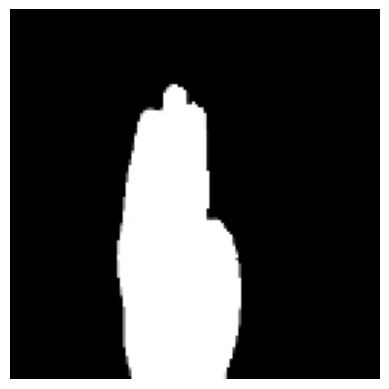

In [34]:
#any random image from the test set
randomidx = random.randint(0,X_test.shape[1]-1)

random_img = X_test[:,randomidx].reshape(IMAGE_SIZE,IMAGE_SIZE)
correct_label = Y_test[0,randomidx]
# print(X_test[:,randomidx].shape)
X_img = X_test[:,randomidx].reshape(-1,1) ## this is basically keepdims = True
Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X_img)
prediction = predict(A2)
# print(prediction)
predicted_label = get_key_from_value(predict(A2))

print(randomidx)
print("Correct Label: ", correct_label)
print("Predicted Label: ", predicted_label)
plt.imshow(random_img, cmap="gray")
plt.axis('off')
plt.show()
